<a href="https://colab.research.google.com/github/hatchdavid1/MX_covid_maps/blob/master/covid_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### Main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly 
import warnings
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from plotly.offline import iplot
import statsmodels.api as sm
import scipy
from datetime import datetime
from datetime import timedelta
from datetime import date
!pip install prophet
import prophet
import itertools
import plotly.express as px
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 1000)
pd.set_option('max_rows', 50)
pd.set_option('max_columns', 1000)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 179 kB 19.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639649 sha256=cfdec2647bb195fcfb19111d777f314b9ef239ccfc8133cdc6d2174e4fd2593a
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [2]:
# To get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
confirmados = pd.read_csv('/content/drive/MyDrive/Códigos_Python/Sanofi/Casos_Diarios_Estado_Nacional_Confirmados_20210801.csv')
confirmados.head()

,cve_ent,poblacion,nombre,18-02-2020,19-02-2020,20-02-2020,21-02-2020,22-02-2020,23-02-2020,24-02-2020,25-02-2020,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,04-03-2020,05-03-2020,06-03-2020,07-03-2020,08-03-2020,09-03-2020,10-03-2020,11-03-2020,12-03-2020,13-03-2020,14-03-2020,15-03-2020,16-03-2020,17-03-2020,18-03-2020,19-03-2020,20-03-2020,21-03-2020,22-03-2020,23-03-2020,24-03-2020,25-03-2020,26-03-2020,27-03-2020,28-03-2020,29-03-2020,30-03-2020,31-03-2020,01-04-2020,02-04-2020,03-04-2020,04-04-2020,05-04-2020,06-04-2020,07-04-2020,08-04-2020,09-04-2020,10-04-2020,11-04-2020,12-04-2020,13-04-2020,14-04-2020,15-04-2020,16-04-2020,17-04-2020,18-04-2020,19-04-2020,20-04-2020,21-04-2020,22-04-2020,23-04-2020,24-04-2020,25-04-2020,26-04-2020,27-04-2020,28-04-2020,29-04-2020,30-04-2020,01-05-2020,02-05-2020,03-05-2020,04-05-2020,05-05-2020,06-05-2020,07-05-2020,08-05-2020,09-05-2020,10-05-2020,11-05-2020,12-05-2020,13-05-2020,14-05-2020,15-05-2020,16-05-2020,17-05-2020,18-05-2020,19-05-2020,20-05-2020,21-05-2020,22-05-2020,23-05-2020,24-05-2020,25-05-2020,26-05-2020,27-05-2020,28-05-2020,29-05-2020,30-05-2020,31-05-2020,01-06-2020,02-06-2020,03-06-2020,04-06-2020,05-06-2020,06-06-2020,07-06-2020,08-06-2020,09-06-2020,10-06-2020,11-06-2020,12-06-2020,13-06-2020,14-06-2020,15-06-2020,16-06-2020,17-06-2020,18-06-2020,19-06-2020,20-06-2020,21-06-2020,22-06-2020,23-06-2020,24-06-2020,25-06-2020,26-06-2020,27-06-2020,28-06-2020,29-06-2020,30-06-2020,01-07-2020,02-07-2020,03-07-2020,04-07-2020,05-07-2020,06-07-2020,07-07-2020,08-07-2020,09-07-2020,10-07-2020,11-07-2020,12-07-2020,13-07-2020,14-07-2020,15-07-2020,16-07-2020,17-07-2020,18-07-2020,19-07-2020,20-07-2020,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,27-07-2020,28-07-2020,29-07-2020,30-07-2020,31-07-2020,01-08-2020,02-08-2020,03-08-2020,04-08-2020,05-08-2020,06-08-2020,07-08-2020,08-08-2020,09-08-2020,10-08-2020,11-08-2020,12-08-2020,13-08-2020,14-08-2020,15-08-2020,16-08-2020,17-08-2020,18-08-2020,19-08-2020,20-08-2020,21-08-2020,22-08-2020,23-08-2020,24-08-2020,25-08-2020,26-08-2020,27-08-2020,28-08-2020,29-08-2020,30-08-2020,31-08-2020,01-09-2020,02-09-2020,03-09-2020,04-09-2020,05-09-2020,06-09-2020,07-09-2020,08-09-2020,09-09-2020,10-09-2020,11-09-2020,12-09-2020,13-09-2020,14-09-2020,15-09-2020,16-09-2020,17-09-2020,18-09-2020,19-09-2020,20-09-2020,21-09-2020,22-09-2020,23-09-2020,24-09-2020,25-09-2020,26-09-2020,27-09-2020,28-09-2020,29-09-2020,30-09-2020,01-10-2020,02-10-2020,03-10-2020,04-10-2020,05-10-2020,06-10-2020,07-10-2020,08-10-2020,09-10-2020,10-10-2020,11-10-2020,12-10-2020,13-10-2020,14-10-2020,15-10-2020,16-10-2020,17-10-2020,18-10-2020,19-10-2020,20-10-2020,21-10-2020,22-10-2020,23-10-2020,24-10-2020,25-10-2020,26-10-2020,27-10-2020,28-10-2020,29-10-2020,30-10-2020,31-10-2020,01-11-2020,02-11-2020,03-11-2020,04-11-2020,05-11-2020,06-11-2020,07-11-2020,08-11-2020,09-11-2020,10-11-2020,11-11-2020,12-11-2020,13-11-2020,14-11-2020,15-11-2020,16-11-2020,17-11-2020,18-11-2020,19-11-2020,20-11-2020,21-11-2020,22-11-2020,23-11-2020,24-11-2020,25-11-2020,26-11-2020,27-11-2020,28-11-2020,29-11-2020,30-11-2020,01-12-2020,02-12-2020,03-12-2020,04-12-2020,05-12-2020,06-12-2020,07-12-2020,08-12-2020,09-12-2020,10-12-2020,11-12-2020,12-12-2020,13-12-2020,14-12-2020,15-12-2020,16-12-2020,17-12-2020,18-12-2020,19-12-2020,20-12-2020,21-12-2020,22-12-2020,23-12-2020,24-12-2020,25-12-2020,26-12-2020,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020,01-01-2021,02-01-2021,03-01-2021,04-01-2021,05-01-2021,06-01-2021,07-01-2021,08-01-2021,09-01-2021,10-01-2021,11-01-2021,12-01-2021,13-01-2021,14-01-2021,15-01-2021,16-01-2021,17-01-2021,18-01-2021,19-01-2021,20-01-2021,21-01-2021,22-01-2021,23-01-2021,24-01-2021,25-01-2021,26-01-2021,27-01-2021,28-01-2021,29-01-2021,30-01-2021,31-01-2021,01-02-2021,02-02-2021,03-02-2021,04-02-2021,05-02-2021,06-02-2021,07-02-2021,08-02-2021,09-02-2021,10-02-2021,11-02-2021,12-02-2021,13-

In [15]:
confirmados_nacional = confirmados[confirmados.nombre == 'Nacional']
confirmados_nacional.shape

(1, 534)

In [16]:
confirmados_nacional = confirmados_nacional.T
confirmados_nacional = confirmados_nacional.iloc[2:,:]
confirmados_nacional.columns = confirmados_nacional.iloc[0]
df = confirmados_nacional.iloc[1:,:]
df.head()

nombre,Nacional
18-02-2020,0
19-02-2020,1
20-02-2020,0
21-02-2020,0
22-02-2020,0


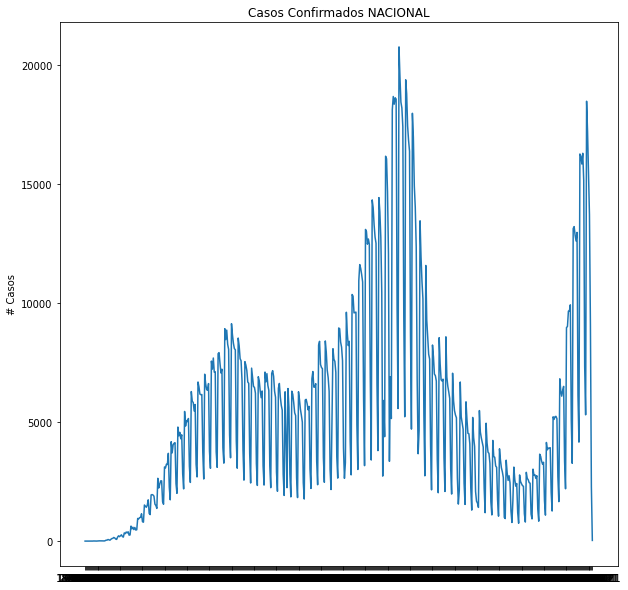

In [25]:
plt.figure(figsize=(10,10))
plt.plot(df.index, df['Nacional'])
plt.title('Casos Confirmados NACIONAL')
plt.ylabel('# Casos');
plt.show()

In [22]:
cdmx = confirmados[confirmados.nombre == 'DISTRITO FEDERAL']
cdmx = cdmx.T
cdmx = cdmx.iloc[2:,:]
cdmx.columns = cdmx.iloc[0]
df_cdmx = cdmx.iloc[1:,:]
df_cdmx.head()

nombre,DISTRITO FEDERAL
18-02-2020,0
19-02-2020,0
20-02-2020,0
21-02-2020,0
22-02-2020,0


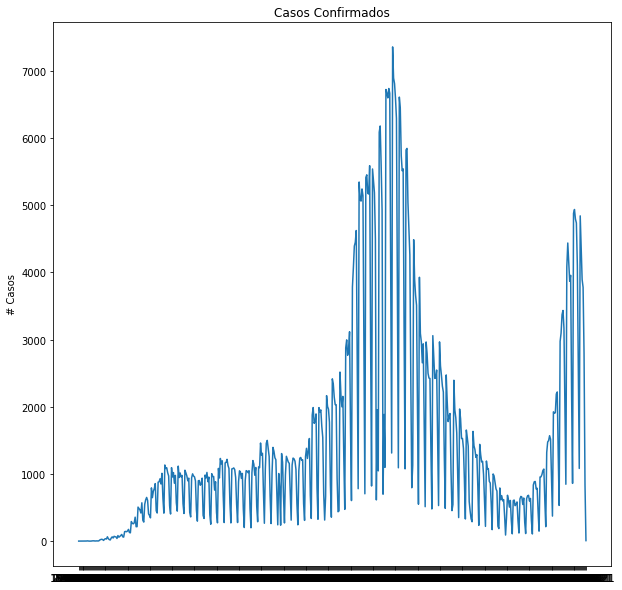

In [24]:
plt.figure(figsize=(10,10))
plt.plot(df_cdmx.index, df_cdmx['DISTRITO FEDERAL'])
plt.title('Casos Confirmados CIUDAD DE MÉXICO')
plt.ylabel('# Casos');
plt.show()

In [29]:
df['date'] = df.index
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['year-month'] = df.year.astype(str) + '-' + df.month.astype(str)
df.head()

nombre,Nacional,Month,date,year,month,year-month
18-02-2020,0,18-02-2020,18-02-2020,2020,2,2020-2
19-02-2020,1,19-02-2020,19-02-2020,2020,2,2020-2
20-02-2020,0,20-02-2020,20-02-2020,2020,2,2020-2
21-02-2020,0,21-02-2020,21-02-2020,2020,2,2020-2
22-02-2020,0,22-02-2020,22-02-2020,2020,2,2020-2


In [35]:
df_cdmx['date'] = df_cdmx.index
df_cdmx['year'] = pd.DatetimeIndex(df_cdmx['date']).year
df_cdmx['month'] = pd.DatetimeIndex(df_cdmx['date']).month
df_cdmx['year-month'] = df_cdmx.year.astype(str) + '-' + df_cdmx.month.astype(str)
df_cdmx.head()

nombre,DISTRITO FEDERAL,date,year,month,year-month
18-02-2020,0,18-02-2020,2020,2,2020-2
19-02-2020,0,19-02-2020,2020,2,2020-2
20-02-2020,0,20-02-2020,2020,2,2020-2
21-02-2020,0,21-02-2020,2020,2,2020-2
22-02-2020,0,22-02-2020,2020,2,2020-2


In [37]:
df_agrupado =df[['Nacional', 'year-month']] 
df_agrupado = pd.DataFrame(df_agrupado.groupby(['year-month'], as_index=False).sum())
df_cdmx_agrupado =df_cdmx[['DISTRITO FEDERAL', 'year-month']]
df_cdmx_agrupado = pd.DataFrame(df_cdmx_agrupado.groupby(['year-month'], as_index=False).sum())

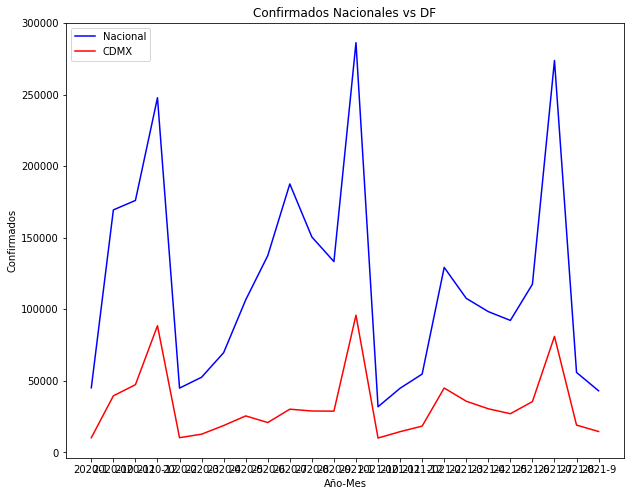

In [38]:
plt.figure(figsize=(10, 8))
plt.plot(df_agrupado['year-month'], df_agrupado['Nacional'], 'b-', label = 'Nacional')
plt.plot(df_cdmx_agrupado['year-month'], df_cdmx_agrupado['DISTRITO FEDERAL'], 'r-', label = 'CDMX')
plt.xlabel('Año-Mes'); plt.ylabel('Confirmados'); plt.title('Confirmados Nacionales vs DF')
plt.legend();

In [41]:
df_nacional = df.rename(columns={'date': 'ds', 'Nacional': 'y'})
# Make the prophet model and fit on the data
nacional_prophet = prophet.Prophet(changepoint_prior_scale=0.15)
nacional_prophet.fit(df_nacional)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
nacional_forecast = nacional_prophet.make_future_dataframe(periods=4, freq='W')
# Make predictions
nacional_forecast = nacional_prophet.predict(nacional_forecast)

<Figure size 720x720 with 0 Axes>

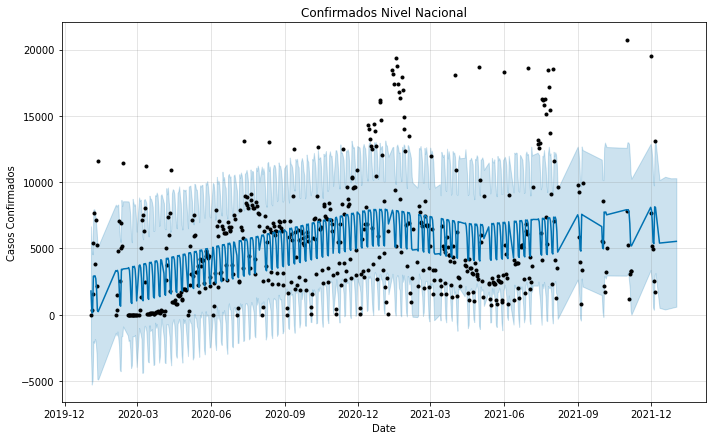

In [48]:
plt.figure(figsize=(10,10))
nacional_prophet.plot(nacional_forecast, xlabel = 'Date', ylabel = 'Casos Confirmados')
plt.title('Confirmados Nivel Nacional');

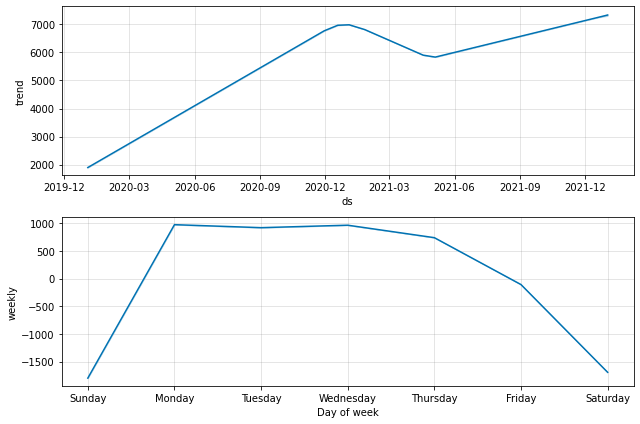

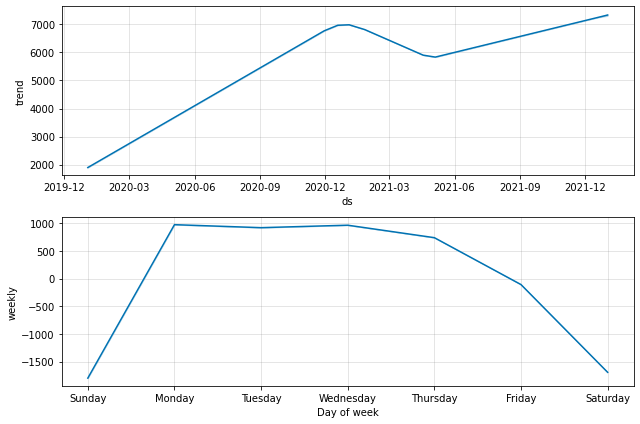

In [49]:
nacional_prophet.plot_components(nacional_forecast)

In [50]:
nacional_prophet.changepoints[:10]

17    2020-02-10
34    2020-03-05
51    2020-03-22
68    2020-04-10
85    2020-04-27
102   2020-05-16
118   2020-06-03
135   2020-06-20
152   2020-07-09
169   2020-07-26
Name: ds, dtype: datetime64[ns]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


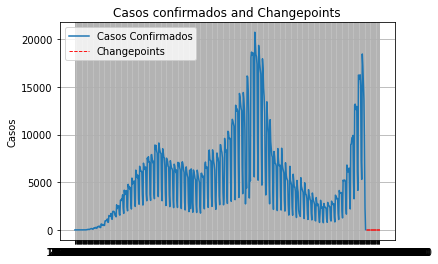

In [55]:
nacional_changepoints = [str(date) for date in nacional_prophet.changepoints]
plt.plot(df['date'], df['Nacional'], label = 'Casos Confirmados')
# Plot the changepoints
plt.vlines(nacional_changepoints, ymin = 0, ymax= 100, colors = 'r', linewidth=0.9, linestyles = 'dashed', label = 'Changepoints')
# Formatting of plot
plt.grid('off'); plt.ylabel('Casos'); plt.legend()
plt.title('Casos confirmados and Changepoints');

In [56]:
nacional_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-03,1898.476696,-2862.333134,6661.713601,1898.476696,1898.476696,-107.735903,-107.735903,-107.735903,-107.735903,-107.735903,-107.735903,0.0,0.0,0.0,1790.740792
1,2020-01-04,1913.151892,-5267.891087,5001.720741,1913.151892,1913.151892,-1693.420295,-1693.420295,-1693.420295,-1693.420295,-1693.420295,-1693.420295,0.0,0.0,0.0,219.731597
2,2020-01-05,1927.827088,-4948.494215,4554.443708,1927.827088,1927.827088,-1798.964786,-1798.964786,-1798.964786,-1798.964786,-1798.964786,-1798.964786,0.0,0.0,0.0,128.862302
3,2020-01-06,1942.502285,-1997.464006,7927.035126,1942.502285,1942.502285,974.631399,974.631399,974.631399,974.631399,974.631399,974.631399,0.0,0.0,0.0,2917.133683
4,2020-01-07,1957.177481,-2135.168004,7958.317172,1957.177481,1957.177481,920.578632,920.578632,920.578632,920.578632,920.578632,920.578632,0.0,0.0,0.0,2877.756113
